In [9]:
#unzip
!unzip '/content/drive/MyDrive/Colab Notebooks/Flowers.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Flowers/Training/tulip/38287568_627de6ca20.jpg  
  inflating: __MACOSX/Flowers/Training/tulip/._38287568_627de6ca20.jpg  
  inflating: Flowers/Training/tulip/17104364030_ee31ee279b_n.jpg  
  inflating: __MACOSX/Flowers/Training/tulip/._17104364030_ee31ee279b_n.jpg  
  inflating: Flowers/Training/tulip/8585101979_4398146bf1_n.jpg  
  inflating: __MACOSX/Flowers/Training/tulip/._8585101979_4398146bf1_n.jpg  
  inflating: Flowers/Training/tulip/5574219476_1f46775487_n.jpg  
  inflating: __MACOSX/Flowers/Training/tulip/._5574219476_1f46775487_n.jpg  
  inflating: Flowers/Training/tulip/14861513337_4ef0bfa40d.jpg  
  inflating: __MACOSX/Flowers/Training/tulip/._14861513337_4ef0bfa40d.jpg  
  inflating: Flowers/Training/tulip/21091481475_884cd885c8_n.jpg  
  inflating: __MACOSX/Flowers/Training/tulip/._21091481475_884cd885c8_n.jpg  
  inflating: Flowers/Training/tulip/14087892193_653a3ac7ca_n.jpg  
  inflating: __MACOSX/Flowers/

#Image Augmentation

In [66]:
# Import required library
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [67]:
# Creating augumentation on training variable
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [68]:
# Creating augumentation on testing variable
test_datagen = ImageDataGenerator(rescale=1./255)

In [69]:
xtrain = train_datagen.flow_from_directory('/content/Flowers/Training', 
                                           target_size=(64,64),
                                           class_mode='categorical',
                                           batch_size=100)

Found 4317 images belonging to 5 classes.


In [70]:
xtest = test_datagen.flow_from_directory('/content/Flowers/Testing',
                                         target_size=(64,64),
                                         class_mode='categorical',
                                         batch_size=100)

Found 120 images belonging to 5 classes.


In [71]:
num_classes = len(xtrain.class_indices) 
print(num_classes)

5


#Create Model

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense

In [73]:
model = Sequential()

model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3))) # Convolution layer
model.add(MaxPooling2D(pool_size=(2,2))) # Max pooling layer
model.add(Flatten()) # Flatten layer

# Fully connected layers

model.add(Dense(300, activation='relu')) # Hidden layer 1
model.add(Dense(150, activation='relu')) # Hidden layer 2
model.add(Dense(5, activation='softmax')) # O/P

In [74]:
# Compile the model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [75]:
# Train model
# Fit The Model
model.fit_generator(xtrain, 
                    steps_per_epoch=len(xtrain),
                    epochs=10,
                    validation_data=xtest, 
                    validation_steps=len(xtest))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/10
44/44 [==============================] - 15s 334ms/step - loss: 1.5322 - accuracy: 0.3970 - val_loss: 1.1288 - val_accuracy: 0.6083
Epoch 2/10
44/44 [==============================] - 14s 322ms/step - loss: 1.1184 - accuracy: 0.5529 - val_loss: 1.0505 - val_accuracy: 0.5750
Epoch 3/10
44/44 [==============================] - 14s 325ms/step - loss: 0.9910 - accuracy: 0.6176 - val_loss: 1.0605 - val_accuracy: 0.5667
Epoch 4/10
44/44 [==============================] - 14s 328ms/step - loss: 0.9082 - accuracy: 0.6495 - val_loss: 0.8898 - val_accuracy: 0.6583
Epoch 5/10
44/44 [==============================] - 14s 322ms/step - loss: 0.8426 - accuracy: 0.6847 - val_loss: 0.8410 - val_accuracy: 0.6917
Epoch 6/10
44/44 [==============================] - 14s 324ms/step - loss: 0.8245 - accuracy: 0.6833 - val_loss: 0.7955 - val_accuracy: 0.7000
Epoch 7/10
44/44 [==============================] - 14s 321ms/step - loss: 0.7861 - accuracy: 0.7019 - val_loss: 0.7400 - val_accuracy: 0.7417

In [76]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 30752)             0         
                                                                 
 dense_7 (Dense)             (None, 300)               9225900   
                                                                 
 dense_8 (Dense)             (None, 150)               45150     
                                                                 
 dense_9 (Dense)             (None, 5)                 755       
                                                      

In [121]:
#Saving....
model.save('Flowers.h5')

# Testing

In [77]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [109]:
img = image.load_img('/content/Flowers/Testing/rose/5002447916_8a7b7b689a_n.jpg', target_size=(64,64))

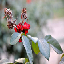

In [110]:
img

In [111]:
x = image.img_to_array(img)
x

array([[[ 84.,  96.,  96.],
        [ 79.,  88.,  83.],
        [ 95., 103.,  92.],
        ...,
        [131., 140., 121.],
        [115., 127., 105.],
        [110., 118., 103.]],

       [[ 94., 102., 105.],
        [ 88.,  93.,  89.],
        [106., 112., 108.],
        ...,
        [142., 150., 135.],
        [123., 136., 119.],
        [112., 126., 111.]],

       [[ 97., 101., 100.],
        [101., 103.,  98.],
        [116., 125., 122.],
        ...,
        [151., 158., 150.],
        [133., 143., 132.],
        [120., 132., 118.]],

       ...,

       [[196., 184., 184.],
        [177., 166., 170.],
        [179., 174., 180.],
        ...,
        [151., 148., 155.],
        [176., 172., 187.],
        [144., 141., 148.]],

       [[158., 153., 157.],
        [148., 143., 149.],
        [148., 147., 152.],
        ...,
        [150., 144., 158.],
        [151., 145., 155.],
        [189., 184., 191.]],

       [[147., 146., 151.],
        [155., 153., 158.],
        [185., 1

In [112]:
x = np.expand_dims(x, axis=0)
x

array([[[[ 84.,  96.,  96.],
         [ 79.,  88.,  83.],
         [ 95., 103.,  92.],
         ...,
         [131., 140., 121.],
         [115., 127., 105.],
         [110., 118., 103.]],

        [[ 94., 102., 105.],
         [ 88.,  93.,  89.],
         [106., 112., 108.],
         ...,
         [142., 150., 135.],
         [123., 136., 119.],
         [112., 126., 111.]],

        [[ 97., 101., 100.],
         [101., 103.,  98.],
         [116., 125., 122.],
         ...,
         [151., 158., 150.],
         [133., 143., 132.],
         [120., 132., 118.]],

        ...,

        [[196., 184., 184.],
         [177., 166., 170.],
         [179., 174., 180.],
         ...,
         [151., 148., 155.],
         [176., 172., 187.],
         [144., 141., 148.]],

        [[158., 153., 157.],
         [148., 143., 149.],
         [148., 147., 152.],
         ...,
         [150., 144., 158.],
         [151., 145., 155.],
         [189., 184., 191.]],

        [[147., 146., 151.],
       

In [113]:
xtrain.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [114]:
op = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
pred = np.argmax(model.predict(x))
op[pred]

'tulip'

#Model Tuning

In [115]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [86]:
early_stopping = EarlyStopping(monitor='val_accuracy',
                        patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',
                        patience=5,
                        factor=0.5,min_lr=0.00001)

callback = [reduce_lr,early_stopping]

In [118]:
# Train model

model.fit_generator(xtrain,
                    steps_per_epoch=len(xtrain),
                    epochs=100,
                    callbacks=callback,
                    validation_data=xtest,
                    validation_steps=len(xtest))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/100
44/44 [==============================] - 15s 334ms/step - loss: 0.3597 - accuracy: 0.8717 - val_loss: 0.2396 - val_accuracy: 0.9167 - lr: 5.0000e-04
Epoch 2/100
44/44 [==============================] - 14s 320ms/step - loss: 0.3254 - accuracy: 0.8888 - val_loss: 0.2867 - val_accuracy: 0.9000 - lr: 5.0000e-04
Epoch 3/100
44/44 [==============================] - 14s 322ms/step - loss: 0.3209 - accuracy: 0.8918 - val_loss: 0.2264 - val_accuracy: 0.9083 - lr: 5.0000e-04
Epoch 4/100
44/44 [==============================] - 14s 321ms/step - loss: 0.2881 - accuracy: 0.8958 - val_loss: 0.2390 - val_accuracy: 0.9083 - lr: 5.0000e-04
Epoch 5/100
44/44 [==============================] - 14s 321ms/step - loss: 0.2935 - accuracy: 0.8995 - val_loss: 0.2450 - val_accuracy: 0.9083 - lr: 5.0000e-04
Epoch 6/100
44/44 [==============================] - 14s 321ms/step - loss: 0.2662 - accuracy: 0.9127 - val_loss: 0.1933 - val_accuracy: 0.9417 - lr: 5.0000e-04
Epoch 7/100
44/44 [===============

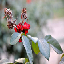

In [119]:
# Testing

ig = image.load_img('/content/Flowers/Testing/rose/5002447916_8a7b7b689a_n.jpg',target_size=(64,64))
ig


In [120]:
y = image.img_to_array(ig)
y = np.expand_dims(y,axis=0)
predt = np.argmax(model.predict(y))
op = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
op[predt]

'rose'